In [1]:
include("spde/spde_solvers.jl")
using .SPDE_Solvers
using Plots

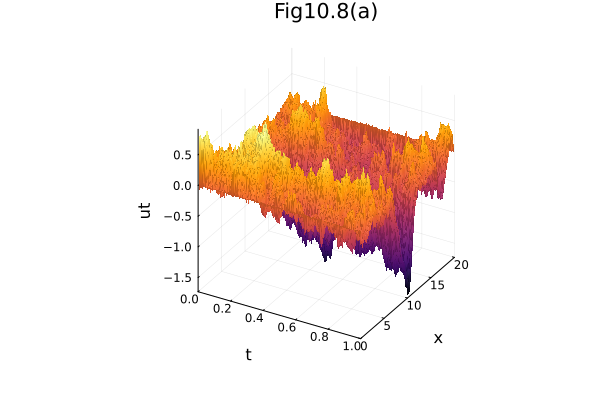

In [2]:
using Plots
using LinearAlgebra
using MeshGrid

# Define parameters
a = 20
J = 1024
x = range(0, a, length=J+1)
u0 = 1 ./ (1 .+ exp.(-(2 .- x) ./ sqrt(2)))

ell = 1
N = 1000
T = 1
epsilon = 1
sigma = 1

# Call the SPDE solver function (assuming you have implemented `spde_fd_n_exp`)
t, ut = finite_difference_with_exponent_covariance(u0, T, a, N, J, epsilon, sigma, ell, fNagumo)

# Note we do not downsample as the original example with rstride
# 3D Wireframe Plot
surface(t, x, ut; colorbar=false,
    xlabel="t", ylabel="x", zlabel="ut")
title!("Fig10.8(a)")


Examine the convergence of the white noise finit difference solution    

In [3]:
T = 0.1
epsilon = 0.1
sigma = 1.0
a = 1.0
M = Int(1e4)
J_vals = 4 .* 2 .^ [2, 3, 4]
N_vals = Int.(0.25 .* J_vals .^ 2)
v = zeros(length(N_vals))

for i in eachindex(J_vals)
    v[i] = l2_sq_mct(T, a, N_vals[i], J_vals[i], M, epsilon, sigma)
end

println(v)


[0.3347977470655887, 0.3470764700504308, 0.3462625298409976]


The algorithm 'spde_oned_Gal_MJDt' for the Allen-Cahn example was skipped due to an issue with the indexing used in 'get_oned_dW'. I suspect the array construction of nn2 needs debugging in the original python version. The Matlab version looks correct.

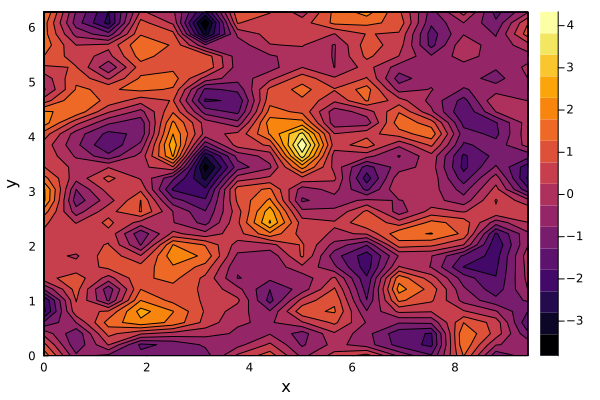

In [4]:
# Get the realization of the 2D Q-processes
J = [32, 16]
dtref = 0.01
kappa = 100
a = [2π, 3π]
alpha = 0.05

# Assuming these functions exist
bj = get_twod_bj(dtref, J, a, alpha)
W1, W2 = get_twod_dW(bj, kappa, 1)

# Generate grid
gridx = LinRange(0, a[1], J[1])  # Second dimension
gridy = LinRange(0, a[2], J[2])  # First dimension

# Create the plot
p = contourf(gridy, gridx, W1[1, :, :], xlabel="x", ylabel="y")

# Ensure it shows in Jupyter
display(p)


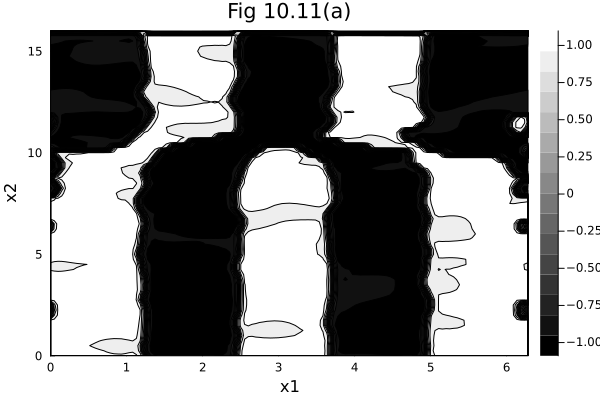

In [ ]:
# The 2D algorithm on page 471
function fAC(u)
    return u - u.^3
end


# Parameters
T = 10; N = Int(1e3); a = [2*pi, 16]; J = [128, 64]
alpha = 0.1; epsilon = 1e-3; sigma = 0.1; M = 2; kappa = 1

x = range(0, a[1], length=J[1]+1)
y = range(0, a[2], length=J[2]+1)
xx, yy = [repeat(x, 1, length(y)), repeat(y', length(x), 1)]
u0 = sin.(xx .* 8 ./ pi) .* cos.(pi^2 .* yy ./ 64)

# Run simulation
t, u, ut = spde_twod_Gal(u0, T, a, N, kappa, J, epsilon, 
                         fAC, u -> sigma, alpha, M)

using Plots
contourf(x, y, ut[:, :, end]', fill=true,color=:bone)
xlabel!("x1")
ylabel!("x2")
title!("Fig 10.11(a)")
